In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from tqdm import tqdm, trange
import scipy.stats as stats
import tikzplotlib

In [4]:
soc_frequency_df2 = pd.read_csv("../data/analysis_data/soc_frequency.csv", index_col=None)

In [5]:
text = """27:Arts, Design, Entertainment, Sports, and Media Occupations	131
33:Protective Service Occupations	71
11:Management Occupations	63
21:Community and Social Service Occupations	47
55:Military Specific Occupations	43
53:Transportation and Material Moving Occupations	37
29:Healthcare Practitioners and Technical Occupations	31
51:Production Occupations	29
41:Sales and Related Occupations	27
23:Legal Occupations	26
43:Office and Administrative Support Occupations	26
Can't Say	25
39:Personal Care and Service Occupations	23
25:Educational Instruction and Library Occupations	19
37:Building and Grounds Cleaning and Maintenance Occupations	19
19:Life, Physical, and Social Science Occupations	18
13:Business and Financial Operations Occupations	14
35:Food Preparation and Serving Related Occupations	13
45:Farming, Fishing, and Forestry Occupations	12
47:Construction and Extraction Occupations	12
17:Architecture and Engineering Occupations	7
49:Installation, Maintenance, and Repair Occupations	6
15:Computer and Mathematical Occupations	3
31:Healthcare Support Occupations	2"""

soc_frequency_df["count"] = 0

for line in text.split("\n"):
    if not line.startswith("Can't"):
        name, count = line.split("\t")
        count = int(count)
        code = int(name.split(":")[0])
        soc_frequency_df.loc[code, "count"] = count

NameError: name 'soc_frequency_df' is not defined

In [6]:
soc_frequency_df.index = soc_frequency_df.soc_code

In [8]:
years = np.arange(1950, 2018).astype(str)

In [10]:
soc_frequency_df.loc[11, years].values

array([0.0004162905320447621, 0.00044122593826040476,
       0.000585200562151742, 0.00040918838552289095,
       0.0005436579774802294, 0.0005476741647707196,
       0.0005693714865710463, 0.0005607670294618427,
       0.0005575718772729725, 0.0004140554946985991,
       0.0005124151357085618, 0.0004631853769570187,
       0.0005855470860372362, 0.0005098983811439227,
       0.0006766845448905036, 0.00047955061626274524,
       0.0007112799462765087, 0.0007556620959207967,
       0.0006141150243131669, 0.0006769470589848008,
       0.0006728047823296427, 0.0005734267154564564,
       0.00047077466425523635, 0.0005640131212701401,
       0.0006301363643903764, 0.0006251467348141921,
       0.0006041044005804645, 0.0006295290616733768,
       0.0004978601405698722, 0.00047873196832350285,
       0.0005336436650382457, 0.0004919879516145285,
       0.0005309304117898706, 0.0004838618235300213, 0.000440957875523153,
       0.0003963746732519718, 0.0005495244911012746,
       0.00046114195

In [11]:
corr_col = []
pvalue_col = []

for i in range(23):
    code = 11 + 2*i
    time = years.astype(np.int)
    freq = soc_frequency_df.loc[code, years]
    corr, pvalue = stats.spearmanr(freq, time)
    corr_col.append(corr)
    pvalue_col.append(pvalue)

In [12]:
soc_frequency_df["correlation"] = corr_col
soc_frequency_df["pvalue"] = pvalue_col

In [13]:
(soc_frequency_df.pvalue < 0.05).sum()

19

In [19]:
soc_frequency_df = soc_frequency_df.drop(columns=["soc_code"])

In [22]:
soc_frequency_df = soc_frequency_df.sort_values(by="correlation", ascending=False)

In [74]:
sorted_by_code = False

if sorted_by_code:
    _df = soc_frequency_df.sort_index()
else:
    _df = soc_frequency_df.sort_values("correlation", ascending=False)

for soc_code, row in _df.iterrows():
    if row.pvalue < 0.05:
        print(f"{soc_code:2d} {row.soc_name:50s} {row['count']:2d} {row['count'] >= 10}\t{row.correlation:6.3f}\t{row.pvalue:.2e}")
    else:
        print(f"{soc_code:2d} {row.soc_name:50s} {row['count']:2d} {row['count'] >= 10}\t{row.correlation:6.3f}")

15 Computer and Mathematical                           3 False	 0.854	2.24e-20
19 Life, Physical, and Social Science                 18 True	 0.575	2.98e-07
27 Arts, Design, Entertainment, Sports, and Media     131 True	 0.280	2.09e-02
23 Legal                                              26 True	-0.023
35 Food Preparation and Serving Related Occupations   13 True	-0.132
31 Healthcare Support                                  2 False	-0.148
13 Business and Financial Operations                  14 True	-0.153
39 Personal Care and Service                          23 True	-0.308	1.07e-02
49 Installation, Maintenance, and Repair               6 False	-0.472	4.91e-05
45 Farming, Fishing, and Forestry                     12 True	-0.475	4.23e-05
17 Architecture and Engineering                        7 False	-0.520	5.39e-06
41 Sales and Related Occupations                      27 True	-0.567	4.76e-07
11 Management                                         63 True	-0.597	7.61e-08
25 Educational In

In [28]:
def find_trend(soc_code, begin_year, end_year):
    years = np.arange(begin_year, end_year + 1).astype(str)
    freq = soc_frequency_df.loc[soc_code, years].values
    time = years.astype(int)
    corr, pval = stats.spearmanr(freq, time)
    name = soc_frequency_df.loc[soc_code, "soc_name"]
    if pval < 0.05:
        print(f"{name:50s} {corr:.3f} {pval:.2e}")
    else:
        print(f"{name:50s} {corr:.3f}")

In [37]:
find_trend(11, 1950, 1970)

Management                                         0.640 1.77e-03


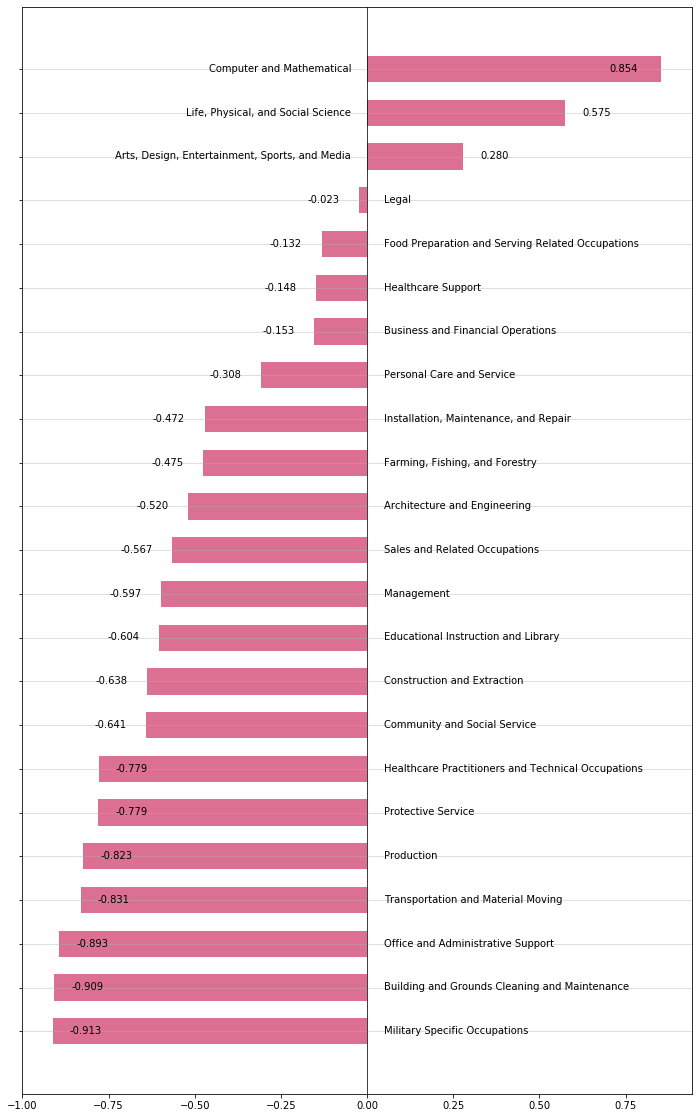

In [168]:
_df = soc_frequency_df.sort_values(by="correlation")
years = np.arange(1950, 2018)

soc_codes = _df.index.values
soc_names = _df.soc_name.values
corr = _df.correlation.values
pvalues = _df.pvalue.values

plt.rcParams.update({"font.size": 10})
plt.figure(figsize=(12, 20))
plt.barh(soc_names, corr, color="palevioletred", height=0.6)
plt.yticks(ticks=np.arange(len(soc_names)), labels=[])
plt.axvline(0, color="black", lw=0.75)
plt.grid(axis="y", alpha=0.5)

for i, c in enumerate(corr):
    if abs(c) > 0.75:
        color = "black"
        if c > 0:
            x = c - 0.15
        else:
            x = c + 0.05
    else:
        color = "black"
        if c > 0:
            x = c + 0.05
        else:
            x = c - 0.15
    plt.text(x, i - 0.05, f"{c:.3f}", color=color)
    
    label = soc_names[i]
    if i == 20:
        plt.text(-0.73, i-0.05, label)
    elif i == 21:
        plt.text(-0.525, i-0.05, label)
    elif i == 22:
        plt.text(-0.46, i-0.05, label)
    else:
        plt.text(0.05, i-0.05, label)
    
# plt.show()
tikzplotlib.save("data/analysis_data/soc_trend.tex")

In [165]:
corr

array([-0.91269993, -0.90880635, -0.89273581, -0.83127839, -0.82333855,
       -0.77936405, -0.77875329, -0.64076039, -0.63827919, -0.60373325,
       -0.59724396, -0.56651525, -0.5204031 , -0.47516891, -0.47161889,
       -0.30766882, -0.1533    , -0.14766459, -0.13161812, -0.0234378 ,
        0.27972669,  0.57468412,  0.85375094])

In [169]:
profession_frequency_df = pd.read_csv("data/analysis_data/top500_merged_profession_frequency.csv", index_col=None)

In [172]:
profession_frequency_df.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,correlation,pvalue
profession,,,,,,,,,,,,,,,,,,,,,
accountant,0.000014,2.912382e-06,0.000008,2.953883e-06,0.000004,2.389870e-06,0.000012,1.118629e-05,0.000005,1.126231e-05,...,4.684715e-06,6.246820e-06,5.750266e-06,5.348605e-06,4.947257e-06,4.641961e-06,6.724351e-06,4.120042e-06,-0.221781,0.069117
acrobat,0.000005,4.853971e-07,0.000002,9.846275e-07,0.000002,6.828201e-07,0.000001,6.292289e-06,0.000003,6.624888e-07,...,6.417418e-07,4.656015e-07,5.124000e-07,3.650925e-07,6.184072e-07,7.320016e-07,4.854478e-07,7.704143e-07,-0.512998,0.000008
actor,0.000030,2.329906e-05,0.000041,3.544659e-05,0.000033,1.707050e-05,0.000021,3.950159e-05,0.000029,1.755595e-05,...,2.708150e-05,2.692729e-05,2.856155e-05,2.893358e-05,2.731905e-05,2.754826e-05,3.315429e-05,2.003077e-05,-0.034050,0.782813
actress,0.000024,1.601810e-05,0.000016,4.676981e-05,0.000019,1.024230e-05,0.000016,1.398287e-05,0.000014,1.258729e-05,...,1.050317e-05,1.247424e-05,1.254431e-05,1.186551e-05,1.098582e-05,8.569775e-06,1.181256e-05,8.575046e-06,-0.257701,0.033868
administrator,0.000005,9.707941e-07,0.000006,4.923138e-07,0.000001,2.048460e-06,0.000004,6.991433e-07,0.000001,1.656222e-06,...,1.946617e-06,1.998206e-06,2.125511e-06,1.898481e-06,1.818845e-06,1.874638e-06,1.833914e-06,1.574325e-06,-0.193801,0.113297


In [171]:
profession_frequency_df.index = profession_frequency_df.profession_merge
profession_frequency_df.index.name = "profession"
profession_frequency_df = profession_frequency_df.drop(columns=["profession_merge"])
years = np.arange(1950, 2018).astype(str)
correlation_col, pvalue_col = [], []

for _, row in profession_frequency_df.iterrows():
    freq = row[years].values
    time = years.astype(int)
    corr, pval = stats.spearmanr(freq, time)
    correlation_col.append(corr)
    pvalue_col.append(pval)
    
profession_frequency_df["correlation"] = correlation_col
profession_frequency_df["pvalue"] = pvalue_col

In [173]:
print((profession_frequency_df.correlation > 0).sum())
print(((profession_frequency_df.correlation > 0) & (profession_frequency_df.pvalue < 0.05)).sum())
print(((profession_frequency_df.correlation < 0) & (profession_frequency_df.pvalue < 0.05)).sum())

277
199
142


In [176]:
print(((soc_frequency_df.correlation > 0) & (soc_frequency_df.pvalue < 0.05)).sum())
print(((soc_frequency_df.correlation < 0) & (soc_frequency_df.pvalue < 0.05)).sum())
print(((soc_frequency_df.correlation > 0) & (soc_frequency_df.pvalue < 0.05) & (soc_frequency_df['count'] >= 20)).sum())
print(((soc_frequency_df.correlation < 0) & (soc_frequency_df.pvalue < 0.05) & (soc_frequency_df['count'] >= 20)).sum())

3
16
1
10


In [181]:
professions = """accountant
acrobat
actor
actor
actress
administrator
administrator
administrator
admiral
advertiser
adviser
adviser
airman
alderman
ambassador
analyst
analyst
analyst
animator
animator
announcer
announcer
anthropologist
apprentice
archaeologist
archaeologist
architect
armed guard
artisan
artist
astrologer
astronaut
astronomer
attorney
attorney general
attorney general
auditor
author
aviator
babysitter
bailiff
baker
baker
ballerina
bank manager
banker
banker
barber
bard
barmaid
barman
barrister
bartender
baseball player
basketball player
bass player
biologist
bishop
blaster
bobby
bodyguard
bodyguard
bookie
bookkeeper
border patrol
bouncer
bounty hunter
bounty hunter
bowler
bowler
boxer
boxer
boy scout
breeder
brewer
brewer
broker
builder
builder
bus driver
butcher
butcher
butler
cab driver
cadet
cameraman
captain
captain
captain
captain
captain
captain
cardiologist
caretaker
caretaker
carpenter
carrier
carrier
carrier
carrier
cashier
cashier
ceo
chairman
chamberlain
chamberlain
chancellor
chancellor
chancellor
chaplain
char
chauffeur
chef
chemist
chemist
chief
chief constable
chief executive
chief executive
chief of staff
chiropractor
choreographer
cinematographer
cleaner
cleaner
cleaning lady
clergyman
cleric
clerk
clerk
coach
coach
coachman
cobbler
columnist
comedian
comedian
comic
commandant
commander
commander
commander
commander
commander in chief
commanding officer
commando
commentator
commentator
commissioner
commissioner
composer
concierge
conductor
conductor
confessor
congressman
congresswoman
constable
constable
construction worker
consultant
contractor
contractor
cook
cop
coroner
corporal
correspondent
councillor
councillor
councilman
counsel
counsellor
counsellor
counsellor
counsellor
counsellor
counsellor
courier
cowboy
cowboy
craftsman
craftsman
craftsman
crew member
crewman
crewman
critic
curator
custodian
cutler
cutter
cutter
cutter
dancer
dancer
dci
deacon
deacon
dealer
dealer
dean
dean
dean
decorator
decorator
defense attorney
delivery boy
dentist
department head
deputy
deputy
deputy
designer
designer
designer
designer
detective
detective
developer
digger
director
director
director
director
director
dispatcher
dispatcher
distributor
distributor
district attorney
district attorney
diver
dj
dj
doctor
doctor
doctor
doctor
doctor
doctor
doorman
driver
driver
druid
drummer
dry cleaner
economist
editor
educator
electrician
engineer
engineer
english teacher
errand boy
escort
escort
estate agent
examiner
examiner
executive
executive
executive
exorcist
exorcist
exterminator
farmer
fiddler
field marshal
film director
film star
filmmaker
firefighter
fireman
fireman
fireman
fisher
fisherman
flight attendant
florist
foot soldier
football player
footballer
foreign minister
foreman
foreman
fortune teller
gardener
gardener
gendarme
general
general
general manager
geologist
girl scout
gold digger
golfer
governess
governor
gp
grader
grocer
groom
grower
guard
guard
guard
guard
guidance counselor
guide
guide
guide
guitar player
guitarist
gunner
gymnast
gynecologist
gypsy
hacker
hairdresser
harper
hatter
headmaster
headmistress
healer
high priest
high priest
historian
hockey player
home secretary
homicide detective
hostess
hostess
hostess
housemaid
hunter
huntsman
iceman
iceman
imam
innkeeper
inspector
inspector
instructor
interpreter
interpreter
investigator
investigator
investigator
jailer
janitor
jester
jeweller
jeweller
jeweller
jeweller
jockey
jockey
journalist
judge
judge
justice
keeper
keeper
laborer
labourer
lama
lawyer
lecturer
lecturer
librarian
lieutenant
lieutenant
lieutenant
lieutenant
lifeguard
lifesaver
lobbyist
locksmith
lumberjack
magician
magician
magistrate
maid
mailman
major
manager
manager
managing director
mannequin
manufacturer
marine
marine
marshall
marshall
marshall
marshall
mason
masseur
masseuse
masterchef
mathematician
mayor
md
mechanic
mechanic
medic
medical examiner
medical officer
merchant
messenger
midwife
milkman
miller
miner
minister
minister
minister
minstrel
minstrel
missionary
missionary
mistress
mistress
monk
monsignor
movie star
music teacher
musician
musician
musketeer
nanny
navigator
navigator
navy seal
neurologist
neurosurgeon
night watchman
notary
novelist
nun
nurse
nurse
officer
officer
officer
officer
oncologist
operative
operative
operator
operator
operator
padre
padre
painter
painter
paralegal
paramedic
parole officer
parson
pastor
pathologist
patrol
peddler
pediatrician
personal assistant
petty officer
pharmacist
photographer
physician
physicist
pianist
piano player
pilot
pilot
piper
pitcher
plastic surgeon
playwright
plumber
po
poet
police
police chief
police commissioner
police force
police officer
policeman
policewoman
porn star
porter
porter
porter
posse
postman
potter
preacher
prefect
president
president
president
president
president
president of the united states
priest
priest
priestess
principal
principal
prior
prison guard
private detective
private eye
private investigator
probation officer
proctor
producer
producer
production designer
professor
professor
programmer
prosecutor
psychiatrist
psychologist
public defender
public prosecutor
publicist
publisher
publisher
puppeteer
rabbi
raiser
raiser
ranger
ranger
ranger
rapper
real estate agent
realtor
receptionist
recruiter
recruiter
rector
referee
referee
referee
referee
registrar
registrar
registrar
repairman
reporter
representative
representative
researcher
retailer
reverend
rock star
rocker
rocker
runner
runner
runner
runner
sailor
sailor
salesman
school teacher
school teacher
scientist
scout
scout
scout
scout
scribe
scribe
sculptor
seal
seaman
seamstress
secret agent
secret police
secretary
secretary
secretary of state
secretary of state
security guard
security officer
senator
sergeant
sergeant
sergeant
sergeant major
shaman
shepherd
shepherd
sheriff
sherlock
shoemaker
shopkeeper
showgirl
singer
sitter
sitter
skater
sketch artist
skier
skipper
skipper
sniper
soccer player
social worker
soldier
solicitor
solicitor
songwriter
soprano
spokesman
spokesperson
spotter
spotter
spotter
spy
spy
ss
staff sergeant
state trooper
steward
steward
steward
steward
steward
stewardess
stockbroker
stripper
stripper
stylist
stylist
superintendent
superintendent
supermodel
surfer
surgeon
surveyor
surveyor
sweeper
swimmer
tailor
teacher
technician
technician
teller
teller
tester
therapist
tour guide
trader
trainer
translator
translator
trapper
travel agent
treasurer
trooper
trooper
trooper
trooper
truck driver
trucker
tutor
typist
understudy
undertaker
up person
usher
usher
valet
vendor
ventriloquist
veterinarian
veterinarian
vicar
vicar
vicar
vice president
viceroy
violinist
vocalist
waiter
waitress
warden
watcher
watchman
weatherman
weaver
wedding planner
wingman
witch doctor
wrestler
writer""".split("\n")

In [213]:
professions

['',
 'accountant',
 'acrobat',
 'actor',
 'actor',
 'actress',
 'administrator',
 'administrator',
 'administrator',
 'admiral',
 'advertiser',
 'adviser',
 'advisor',
 'airman',
 'alderman',
 'ambassador',
 'analyst',
 'analyst',
 'analyst',
 'animator',
 'animator',
 'announcer',
 'announcer',
 'anthropologist',
 'apprentice',
 'archaeologist',
 'archeologist',
 'architect',
 'armed guard',
 'artisan',
 'artist',
 'astrologer',
 'astronaut',
 'astronomer',
 'attorney',
 'attorney general',
 'attorney general',
 'auditor',
 'author',
 'aviator',
 'babysitter',
 'bailiff',
 'baker',
 'baker',
 'ballerina',
 'bank manager',
 'banker',
 'banker',
 'barber',
 'bard',
 'barmaid',
 'barman',
 'barrister',
 'bartender',
 'baseball player',
 'basketball player',
 'bass player',
 'biologist',
 'bishop',
 'blaster',
 'bobby',
 'bodyguard',
 'bodyguard',
 'bookie',
 'bookkeeper',
 'border patrol',
 'bouncer',
 'bounty hunter',
 'bounty hunter',
 'bowler',
 'bowler',
 'boxer',
 'boxer',
 'boy sc

In [184]:
for _, row in profession_frequency_df.loc[professions, ["correlation","pvalue"]].iterrows():
    print(row.pvalue)

0.06911672063414354
7.712944751718568e-06
0.782812820287134
0.782812820287134
0.033868169137984114
0.11329676635704648
0.11329676635704648
0.11329676635704648
3.3943763899918985e-05
0.00010142700790475745
7.208724286606138e-05
7.208724286606138e-05
0.7941283847113061
0.3803948065741417
0.38702192142151093
0.0013808820554601093
0.0013808820554601093
0.0013808820554601093
0.008146110298616501
0.008146110298616501
0.6818655668398833
0.6818655668398833
0.017024912108233727
0.5297379317218568
4.809687977614706e-06
4.809687977614706e-06
0.29579992532044547
0.40408297927853043
0.6387590564619647
0.678462659101758
0.8894025583083585
2.053184998677378e-05
0.0031935145510267127
0.12898308674726514
0.04256962726555169
0.04256962726555169
0.8538454215833979
0.4755397520167083
0.4919809017062994
2.921546968232972e-12
0.0005762415629378875
0.002147499879720129
0.002147499879720129
0.27767548227635624
0.2588111725166444
0.010112551786521895
0.010112551786521895
9.37476517316864e-13
0.6085899931973382

In [185]:
frequency_df = pd.read_csv("data/mentions/frequency.csv", index_col=None)

In [186]:
frequency_df.shape

(4336, 70)

In [206]:
frequency_df.head()

,,profession,no_pos_sense,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1st lieutenant,NaN,1st lieutenant,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,8.581945e-08,0.000000e+00,0.000000e+00,4.380046e-08,2.109458e-08,4.213089e-08,2.065482e-08,6.226171e-08,0.000000e+00
2nd lieutenant,NaN,2nd lieutenant,NaN,0.0,0.0,0.0,0.0,0.000002,3.938203e-07,0.0,0.0,...,1.370989e-07,2.002454e-07,0.000000e+00,0.000000e+00,4.380046e-08,0.000000e+00,4.213089e-08,4.130963e-08,8.301561e-08,0.000000e+00
911 dispatcher,NaN,911 dispatcher,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.106545e-08,2.065482e-08,0.000000e+00,3.860729e-08
911 operator,NaN,911 operator,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,6.854946e-08,5.149167e-07,3.460851e-07,2.015718e-07,2.190023e-07,2.953241e-07,2.738508e-07,1.652385e-07,1.452773e-07,1.544292e-07
able seaman,NaN,able seaman,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,1.370989e-07,1.144259e-07,1.236018e-07,0.000000e+00,2.190023e-08,0.000000e+00,0.000000e+00,1.239289e-07,1.037695e-07,0.000000e+00


In [214]:
professions = """accountant
acrobat
actor
actor
actress
administrator
administrator
administrator
admiral
advertiser
adviser
advisor
airman
alderman
ambassador
analyst
analyst
analyst
animator
animator
announcer
announcer
anthropologist
apprentice
archaeologist
archeologist
architect
armed guard
artisan
artist
astrologer
astronaut
astronomer
attorney
attorney general
attorney general
auditor
author
aviator
babysitter
bailiff
baker
baker
ballerina
bank manager
banker
banker
barber
bard
barmaid
barman
barrister
bartender
baseball player
basketball player
bass player
biologist
bishop
blaster
bobby
bodyguard
bodyguard
bookie
bookkeeper
border patrol
bouncer
bounty hunter
bounty hunter
bowler
bowler
boxer
boxer
boy scout
breeder
brewer
brewer
broker
builder
builder
bus driver
butcher
butcher
butler
cab driver
cadet
cameraman
captain
captain
captain
captain
captain
captain
cardiologist
caretaker
caretaker
carpenter
carrier
carrier
carrier
carrier
cashier
cashier
ceo
chairman
chamberlain
chamberlain
chancellor
chancellor
chancellor
chaplain
char
chauffeur
chef
chemist
chemist
chief
chief constable
chief executive
chief executive
chief of staff
chiropractor
choreographer
cinematographer
cleaner
cleaner
cleaning lady
clergyman
cleric
clerk
clerk
coach
coach
coachman
cobbler
columnist
comedian
comedian
comic
commandant
commander
commander
commander
commander
commander in chief
commanding officer
commando
commentator
commentator
commissioner
commissioner
composer
concierge
conductor
conductor
confessor
congressman
congresswoman
constable
constable
construction worker
consultant
contractor
contractor
cook
cop
coroner
corporal
correspondent
councillor
councilor
councilman
counsel
counsellor
counsellor
counsellor
counselor
counselor
counselor
courier
cowboy
cowboy
craftsman
craftsman
craftsman
crew member
crewman
crewman
critic
curator
custodian
cutler
cutter
cutter
cutter
dancer
dancer
dci
deacon
deacon
dealer
dealer
dean
dean
dean
decorator
decorator
defense attorney
delivery boy
dentist
department head
deputy
deputy
deputy
designer
designer
designer
designer
detective
detective
developer
digger
director
director
director
director
director
dispatcher
dispatcher
distributor
distributor
da
district attorney
diver
dj
deejay
doctor
doc
doctor
dr.
doctor
dr.
doorman
driver
driver
druid
drummer
dry cleaner
economist
editor
educator
electrician
engineer
engineer
english teacher
errand boy
escort
escort
estate agent
examiner
examiner
executive
executive
executive
exorcist
exorcist
exterminator
farmer
fiddler
field marshal
film director
film star
filmmaker
firefighter
fireman
fireman
fireman
fisher
fisherman
flight attendant
florist
foot soldier
football player
footballer
foreign minister
foreman
foreman
fortune teller
gardener
gardener
gendarme
general
general
general manager
geologist
girl scout
gold digger
golfer
governess
governor
gp
grader
grocer
groom
grower
guard
guard
guard
guard
guidance counselor
guide
guide
guide
guitar player
guitarist
gunner
gymnast
gynecologist
gypsy
hacker
hairdresser
harper
hatter
headmaster
headmistress
healer
high priest
high priest
historian
hockey player
home secretary
homicide detective
hostess
hostess
hostess
housemaid
hunter
huntsman
iceman
iceman
imam
innkeeper
inspector
inspector
instructor
interpreter
interpreter
investigator
investigator
investigator
jailer
janitor
jester
jeweler
jeweller
jeweler
jeweller
jockey
jockey
journalist
judge
judge
justice
keeper
keeper
laborer
labourer
lama
lawyer
lecturer
lecturer
librarian
lieutenant
lieutenant
lieutenant
lieutenant
lifeguard
lifesaver
lobbyist
locksmith
lumberjack
magician
magician
magistrate
maid
mailman
major
manager
manager
managing director
mannequin
manufacturer
marine
marine
marshal
marshall
marshal
marshall
mason
masseur
masseuse
masterchef
mathematician
mayor
md
mechanic
mechanic
medic
medical examiner
medical officer
merchant
messenger
midwife
milkman
miller
miner
minister
minister
minister
minstrel
minstrel
missionary
missionary
mistress
mistress
monk
monsignor
movie star
music teacher
musician
musician
musketeer
nanny
navigator
navigator
navy seal
neurologist
neurosurgeon
night watchman
notary
novelist
nun
nurse
nurse
officer
officer
officer
officer
oncologist
operative
operative
operator
operator
operator
padre
padre
painter
painter
paralegal
paramedic
parole officer
parson
pastor
pathologist
patrol
peddler
pediatrician
personal assistant
petty officer
pharmacist
photographer
physician
physicist
pianist
piano player
pilot
pilot
piper
pitcher
plastic surgeon
playwright
plumber
po
poet
police
police chief
police commissioner
police force
police officer
policeman
policewoman
porn star
porter
porter
porter
posse
postman
potter
preacher
prefect
president
president
president
president
president
president of the united states
priest
priest
priestess
principal
principal
prior
prison guard
private detective
private eye
private investigator
probation officer
proctor
producer
producer
production designer
prof
professor
programmer
prosecutor
psychiatrist
psychologist
public defender
public prosecutor
publicist
publisher
publisher
puppeteer
rabbi
raiser
raiser
ranger
ranger
ranger
rapper
real estate agent
realtor
receptionist
recruiter
recruiter
rector
ref
referee
referee
referee
registrar
registrar
registrar
repairman
reporter
representative
representative
researcher
retailer
reverend
rock star
rocker
rocker
runner
runner
runner
runner
sailor
sailor
salesman
school teacher
schoolteacher
scientist
scout
scout
scout
scout
scribe
scribe
sculptor
seal
seaman
seamstress
secret agent
secret police
secretary
secretary
secretary of state
secretary of state
security guard
security officer
senator
sergeant
sergeant
sergeant
sergeant major
shaman
shepherd
shepherd
sheriff
sherlock
shoemaker
shopkeeper
showgirl
singer
sitter
sitter
skater
sketch artist
skier
skipper
skipper
sniper
soccer player
social worker
soldier
solicitor
solicitor
songwriter
soprano
spokesman
spokesperson
spotter
spotter
spotter
spy
spy
ss
staff sergeant
state trooper
steward
steward
steward
steward
steward
stewardess
stockbroker
stripper
stripper
stylist
stylist
superintendent
superintendent
supermodel
surfer
surgeon
surveyor
surveyor
sweeper
swimmer
tailor
teacher
technician
technician
teller
teller
tester
therapist
tour guide
trader
trainer
translator
translator
trapper
travel agent
treasurer
trooper
trooper
trooper
trooper
truck driver
trucker
tutor
typist
understudy
undertaker
up person
usher
usher
valet
vendor
ventriloquist
vet
veterinarian
vicar
vicar
vicar
vice president
viceroy
violinist
vocalist
waiter
waitress
warden
watcher
watchman
weatherman
weaver
wedding planner
wingman
witch doctor
wrestler
writer""".split("\n")

senses = """accountant.n.01
acrobat.n.01
actor.n.01
actor.n.02
actress.n.01
administrator.n.01
administrator.n.02
administrator.n.03
admiral.n.01
advertiser.n.01
adviser.n.01
adviser.n.01
aviator.n.01
alderman.n.01
ambassador.n.01
analyst.n.01
analyst.n.02
analyst.n.03
animator.n.02
energizer.n.01
announcer.n.01
announcer.n.02
anthropologist.n.01
apprentice.n.01
archeologist.n.01
archeologist.n.01
architect.n.01

craftsman.n.03
artist.n.01
astrologer.n.01
astronaut.n.01
astronomer.n.01
lawyer.n.01
attorney_general.n.01
attorney_general.n.02
auditor.n.03
writer.n.01
aviator.n.01
babysitter.n.01
bailiff.n.01
baker.n.01
baker.n.02
ballerina.n.01
bank_manager.n.01
banker.n.02
banker.n.01
barber.n.02
bard.n.01
barmaid.n.01
bartender.n.01
barrister.n.01
bartender.n.01
ballplayer.n.01
basketball_player.n.01

biologist.n.01
bishop.n.01
blaster.n.01
bobby.n.01
bodyguard.n.01
bodyguard.n.02
bookmaker.n.02
bookkeeper.n.01

bouncer.n.01
bounty_hunter.n.01
bounty_hunter.n.02
bowler.n.01
bowler.n.02
boxer.n.01
packer.n.01
boy_scout.n.01
breeder.n.01
brewer.n.01
brewer.n.02
agent.n.04
builder.n.02
builder.n.03
busman.n.01
butcher.n.01
butcher.n.03
butler.n.01

cadet.n.01
cameraman.n.01
captain.n.06
captain.n.01
captain.n.03
captain.n.07
captain.n.02
master.n.07
cardiologist.n.01
caretaker.n.01
caretaker.n.02
carpenter.n.01
carrier.n.05
carrier.n.01
carrier.n.08
mailman.n.01
cashier.n.02
teller.n.03
chief_executive_officer.n.01
president.n.04
chamberlain.n.02
chamberlain.n.03
chancellor_of_the_exchequer.n.01
chancellor.n.02
chancellor.n.03
chaplain.n.01
charwoman.n.01
chauffeur.n.01
chef.n.01
chemist.n.01
pharmacist.n.01
foreman.n.01
chief_constable.n.01
president_of_the_united_states.n.01
president_of_the_united_states.n.02
chief_of_staff.n.01
chiropractor.n.01
choreographer.n.01
cameraman.n.01
cleaner.n.02
cleaner.n.03
charwoman.n.01
clergyman.n.01
cleric.n.01
clerk.n.01
salesclerk.n.01
coach.n.02
coach.n.01
coachman.n.01
cobbler.n.01
columnist.n.01
comedian.n.01
comedian.n.02
comedian.n.01
commanding_officer.n.01
air_force_officer.n.01
commander.n.02
commander.n.03
commanding_officer.n.01
commander_in_chief.n.01
commanding_officer.n.01
commando.n.01
commentator.n.02
observer.n.02
commissioner.n.01
commissioner.n.02
composer.n.01
concierge.n.01
conductor.n.03
conductor.n.01
confessor.n.01
congressman.n.01
congressman.n.01
constable.n.01
constable.n.03
construction_worker.n.01
adviser.n.01
contractor.n.01
contractor.n.02
cook.n.01
bull.n.05
coroner.n.01
corporal.n.01
correspondent.n.02
council_member.n.01

councilman.n.01
advocate.n.02
advocate.n.02
counselor.n.01
counselor.n.02
advocate.n.02
counselor.n.01
counselor.n.02
messenger.n.01
cowboy.n.01
cowboy.n.02
craftsman.n.01
craftsman.n.02
craftsman.n.03
crewman.n.02
crewman.n.02
sailor.n.01
critic.n.01
curator.n.01
custodian.n.01
cutler.n.01
cutter.n.02
cutter.n.03
stonecutter.n.01
dancer.n.01
dancer.n.02
director_of_central_intelligence.n.01
deacon.n.01
deacon.n.02
dealer.n.05
trader.n.01
dean.n.01
dean.n.03
dean.n.04
interior_designer.n.01
decorator.n.02
defense_attorney.n.01
deliveryman.n.01
dentist.n.01

deputy.n.01
deputy.n.02
deputy.n.03
couturier.n.01
architect.n.01
interior_designer.n.01
graphic_designer.n.01
detective.n.01
detective.n.02
developer.n.01
digger.n.01
conductor.n.01
director.n.01
director.n.02
director.n.03
film_director.n.01
dispatcher.n.02
starter.n.03
distributor.n.01
allocator.n.01
district_attorney.n.01
district_attorney.n.01
diver.n.01
disk_jockey.n.01

doctor_of_the_church.n.01
doctor.n.01
doctor.n.04
doctor.n.04
doctor.n.01
doctor.n.01
doorkeeper.n.03
driver.n.02
driver.n.03
druid.n.01
drummer.n.01
cleaner.n.02
economist.n.01
editor.n.01
educator.n.01
electrician.n.01
engineer.n.02
engineer.n.01
english_teacher.n.01
messenger_boy.n.01
bodyguard.n.01
escort.n.03
real_estate_broker.n.01
examiner.n.01
examiner.n.02
administrator.n.03
executive.n.01
executive.n.02
exorcist.n.01
exorcist.n.02
exterminator.n.01
farmer.n.01
violinist.n.01
field_marshal.n.01

film_star.n.01
film_maker.n.01
fireman.n.04
fireman.n.04
reliever.n.03
stoker.n.02
fisherman.n.01
fisherman.n.01
steward.n.03
florist.n.01
infantryman.n.01
football_player.n.01
football_player.n.01
foreign_minister.n.01
foreman.n.02
foreman.n.01
fortuneteller.n.01
gardener.n.01
gardener.n.02
gendarme.n.01
general.n.02
general.n.01
general_manager.n.01
geologist.n.01
girl_scout.n.01

golfer.n.01
governess.n.01
governor.n.01
general_practitioner.n.01
grader.n.01
grocer.n.01
stableman.n.01
agriculturist.n.01
guard.n.01
guard.n.02
guard.n.06
guard.n.05

guide.n.02
scout.n.04
usher.n.03
guitarist.n.01
guitarist.n.01
artilleryman.n.01
gymnast.n.01
gynecologist.n.01
itinerant.n.01
hacker.n.03
hairdresser.n.01
harpist.n.01
hatmaker.n.01
headmaster.n.01
headmistress.n.01
therapist.n.01
archpriest.n.01
high_priest.n.01
historian.n.01
hockey_player.n.01
home_secretary.n.01

hostess.n.01
hostess.n.02
stewardess.n.01
maid.n.01
hunter.n.01
hunter.n.01
hatchet_man.n.01
iceman.n.01
imam.n.01
host.n.08
examiner.n.02
inspector.n.01
teacher.n.01
interpreter.n.01
spokesperson.n.01
detective.n.01
investigator.n.02
research_worker.n.01
prison_guard.n.01
janitor.n.01
jester.n.01
jeweler.n.02
jeweler.n.02
jewelry_maker.n.01
jewelry_maker.n.01
jockey.n.02
jockey.n.01
journalist.n.01
evaluator.n.01
judge.n.01
judge.n.01
custodian.n.01
keeper.n.01
laborer.n.01
laborer.n.01
lama.n.01
lawyer.n.01
lector.n.02
lecturer.n.02
librarian.n.01
deputy.n.02
lieutenant.n.01
lieutenant.n.02
lieutenant.n.04
lifeguard.n.01
lifeguard.n.01
lobbyist.n.01
locksmith.n.01
lumberman.n.01
magician.n.01
sorcerer.n.01
magistrate.n.01
maid.n.01
mailman.n.01
major.n.01
coach.n.01
director.n.01
director.n.01
mannequin.n.01
manufacturer.n.02
marine.n.01
marine.n.02
marshal.n.01
marshal.n.01
marshal.n.02
marshal.n.02
mason.n.04
masseur.n.01
masseuse.n.01

mathematician.n.01
mayor.n.01
doctor.n.01
automobile_mechanic.n.01
machinist.n.01
medical_officer.n.01
coroner.n.01

merchant.n.01
messenger.n.01
midwife.n.01
milkman.n.01
miller.n.04
miner.n.01
curate.n.01
minister.n.02
minister.n.03
folk_singer.n.01
minstrel.n.02
missionary.n.01
missionary.n.02
mistress.n.03
schoolmarm.n.01
monk.n.01
monsignor.n.01
film_star.n.01
music_teacher.n.01
musician.n.01
musician.n.02
musketeer.n.01
nanny.n.01
navigator.n.02
sailing_master.n.01
navy_seal.n.01
neurologist.n.01
neurosurgeon.n.01
night_watchman.n.01
notary.n.01
novelist.n.01
nun.n.01
nurse.n.01
nanny.n.01
military_officer.n.01
officeholder.n.01
policeman.n.01
officer.n.04
oncologist.n.01
private_detective.n.01
secret_agent.n.01
operator.n.05
operator.n.02
operator.n.03
father.n.03
military_chaplain.n.01
painter.n.01
painter.n.02
paralegal.n.01
paramedic.n.01

curate.n.01
curate.n.01
diagnostician.n.01
patrol.n.03
peddler.n.01
baby_doctor.n.01

petty_officer.n.01
pharmacist.n.01
photographer.n.01
doctor.n.01
physicist.n.01
pianist.n.01
pianist.n.01
pilot.n.01
pilot.n.02
piper.n.01
pitcher.n.01
cosmetic_surgeon.n.01
dramatist.n.01
plumber.n.01
petty_officer.n.01
poet.n.01
police.n.01
captain.n.03
police_commissioner.n.01
police.n.01
policeman.n.01
policeman.n.01
police_matron.n.01

doorkeeper.n.03
porter.n.01
porter.n.06
posse.n.01
mailman.n.01
potter.n.01
preacher.n.01
prefect.n.01
president_of_the_united_states.n.01
president.n.01
president.n.03
president.n.04
president.n.05
president_of_the_united_states.n.01
priest.n.01
priest.n.02
priestess.n.01
principal.n.02
star.n.04
prior.n.01
prison_guard.n.01
private_detective.n.01
private_detective.n.01
private_detective.n.01
probation_officer.n.01
proctor.n.01
producer.n.02
manufacturer.n.02

professor.n.01
professor.n.01
programmer.n.01
prosecutor.n.01
psychiatrist.n.01
psychologist.n.01
public_defender.n.01
prosecutor.n.01
publicist.n.01
publisher.n.02
publisher.n.03
puppeteer.n.01
rabbi.n.01
raiser.n.01
agriculturist.n.01
commando.n.01
fire_warden.n.01
texas_ranger.n.01
rapper.n.01
real_estate_broker.n.01
realtor.n.01
receptionist.n.01
recruiter.n.01
recruiter.n.02
curate.n.01
referee.n.01
referee.n.01
referee.n.03
reviewer.n.01
registrar.n.01
registrar.n.02
registrar.n.03
repairman.n.01
reporter.n.01
congressman.n.01
spokesperson.n.01
research_worker.n.01
retailer.n.01
clergyman.n.01
rock_star.n.01
rocker.n.02
rocker.n.01
ball_carrier.n.01
base_runner.n.01
runner.n.03
runner.n.06
bluejacket.n.01
sailor.n.01
salesman.n.01
schoolteacher.n.01
schoolteacher.n.01
scientist.n.01
scout.n.03
lookout.n.01
scout.n.02
scout.n.04
copyist.n.01
scribe.n.02
sculptor.n.01
navy_seal.n.01
mariner.n.01
dressmaker.n.01
secret_agent.n.01
secret_police.n.01
secretary.n.02
secretary.n.01
foreign_minister.n.01
secretary_of_state.n.01
watchman.n.01

senator.n.01
police_sergeant.n.01
serjeant-at-law.n.01
sergeant.n.01
sergeant_major.n.01
shaman.n.01
sheepherder.n.01
shepherd.n.01
sheriff.n.01
private_detective.n.01
cobbler.n.01
shopkeeper.n.01
chorus_girl.n.01
singer.n.01
artist's_model.n.01
babysitter.n.01
skater.n.01

skier.n.01
captain.n.02
master.n.07
sniper.n.01
soccer_player.n.01
social_worker.n.01
soldier.n.01
solicitor.n.01
solicitor.n.02
songwriter.n.01
soprano.n.01
spokesman.n.01
spokesperson.n.01
lookout.n.01
spotter.n.01
spotter.n.02
spy.n.02
spy.n.01
schutzstaffel.n.01
staff_sergeant.n.01

custodian.n.01
steward.n.02
steward.n.03
shop_steward.n.01
steward.n.01
stewardess.n.01
stockbroker.n.01
stripper.n.03
stripper.n.02
hairdresser.n.01
stylist.n.01
overseer.n.01
superintendent.n.02
supermodel.n.01
surfer.n.01
surgeon.n.01
surveyor.n.01
surveyor.n.02
sweeper.n.01
swimmer.n.01
tailor.n.01
teacher.n.01
technician.n.01
technician.n.02
teller.n.02
teller.n.03
examiner.n.01
therapist.n.01
tour_guide.n.01
trader.n.01
trainer.n.01
interpreter.n.01
translator.n.01
trapper.n.01
travel_agent.n.01
treasurer.n.01
cavalryman.n.01
cavalryman.n.02
trooper.n.02
trooper.n.03
teamster.n.02
teamster.n.02
coach.n.02
typist.n.01
understudy.n.01
mortician.n.01

usher.n.02
usher.n.03
valet.n.01
seller.n.01
ventriloquist.n.01
veterinarian.n.01
veterinarian.n.01
vicar.n.01
vicar.n.02
vicar.n.03
vice_president.n.01
viceroy.n.01
violinist.n.01
singer.n.01
waiter.n.01
waitress.n.01
warden.n.01
watchman.n.01
watchman.n.01
weatherman.n.01
weaver.n.01

wingman.n.01
witch_doctor.n.01
wrestler.n.01
writer.n.01""".split("\n")

In [215]:
len(professions), len(senses)

(702, 702)

In [191]:
frequency_df.index = frequency_df[["profession", "no_pos_sense"]]

In [205]:
frequency_df.index = pd.MultiIndex.from_tuples(frequency_df.index.values)

In [209]:
frequency_df.loc[('1st lieutenant',np.nan)]

profession      1st lieutenant
no_pos_sense               NaN
1950                         0
1951                         0
1952                         0
                     ...      
2013               2.10946e-08
2014               4.21309e-08
2015               2.06548e-08
2016               6.22617e-08
2017                         0
Name: (1st lieutenant, nan), Length: 70, dtype: object

In [216]:
map_index = [(profession, sense) if sense else (profession, np.nan) for profession, sense in zip(professions, senses)]

In [222]:
map_index[10:20]

[('adviser', 'adviser.n.01'),
 ('advisor', 'adviser.n.01'),
 ('airman', 'aviator.n.01'),
 ('alderman', 'alderman.n.01'),
 ('ambassador', 'ambassador.n.01'),
 ('analyst', 'analyst.n.01'),
 ('analyst', 'analyst.n.02'),
 ('analyst', 'analyst.n.03'),
 ('animator', 'animator.n.02'),
 ('animator', 'energizer.n.01')]

In [232]:
len(map_index)

702

In [221]:
frequency_df.loc[map_index[10:20]]

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


profession     no_pos_sense          1950  \
adviser    adviser.n.01        adviser     adviser.n.01  4.807498e-06   
advisor    adviser.n.01            NaN              NaN           NaN   
airman     aviator.n.01         airman     aviator.n.01  4.807498e-07   
alderman   alderman.n.01      alderman    alderman.n.01  9.614996e-07   
ambassador ambassador.n.01  ambassador  ambassador.n.01  9.614996e-07   
analyst    analyst.n.01        analyst     analyst.n.01  9.614996e-07   
           analyst.n.02        analyst     analyst.n.02  0.000000e+00   
           analyst.n.03        analyst     analyst.n.03  0.000000e+00   
animator   animator.n.02      animator    animator.n.02  0.000000e+00   
           energizer.n.01     animator   energizer.n.01  0.000000e+00   

                                    1951          1952          1953  \
adviser    adviser.n.01     1.456191e-06  9.977844e-07  4.430824e-06   
advisor    adviser.n.01              NaN           NaN           NaN   
airman     aviator.n.01     0.000000e+00  0.000000e+00  4.923138e-07   
alderman   alderman.n.01    4.853971e-07  9.977844e-07  9.846275e-07   
ambassador ambassador.n.01  2.426985e-06  1.247231e-05  3.938510e-06   
analyst    analyst.n.01     0.000000e+00  0.000000e+00  4.923138e-07   
           analyst.n.02     0.000000e+00  0.000000e+00  0.000000e+00   
           analyst.n.03     0.000000e+00  0.000000e+00  0.000000e+00   
animator   animator.n.02    0.000000e+00  4.988922e-07  0.000000e+00   
           energizer.n.01   0.000000e+00  0.000000e+00  0.000000e+00   

                                    1954          1955          1956  \
adviser    adviser.n.01     2.802361e-06  5.462561e-06  5.290546e-06   
advisor    adviser.n.01              NaN           NaN           NaN   
airman     aviator.n.01     0.000000e+00  1.024230e-06  4.585140e-06   
alderman   alderman.n.01    9.341202e-07  1.365640e-06  0.000000e+00   
ambassador ambassador.n.01  7.005902e-06  1.024230e-05  1.128650e-05   
analyst    analyst.n.01     2.335301e-06  1.707050e-06  1.410812e-06   
           analyst.n.02     4.670601e-07  6.828201e-07  0.000000e+00   
           analyst.n.03     4.670601e-07  0.000000e+00  0.000000e+00   
animator   animator.n.02    4.670601e-07  0.000000e+00  7.054062e-07   
           energizer.n.01   0.000000e+00  0.000000e+00  0.000000e+00   

                                    1957  ...          2008          2009  \
adviser    adviser.n.01     2.447001e-06  ...  6.204357e-06  6.243513e-06   
advisor    adviser.n.01              NaN  ...           NaN           NaN   
airman     aviator.n.01     2.796573e-06  ...  3.859170e-07  6.441720e-07   
alderman   alderman.n.01    0.000000e+00  ...  2.374874e-07  3.716377e-07   
ambassador ambassador.n.01  1.153586e-05  ...  6.055928e-06  7.407977e-06   
analyst    analyst.n.01     3.495716e-07  ...  2.107700e-06  2.254602e-06   
           analyst.n.02     0.000000e+00  ...  2.671733e-07  2.725343e-07   
           analyst.n.03     6.991433e-07  ...  1.781155e-07  9.910338e-08   
animator   animator.n.02    1.048715e-06  ...  3.265451e-07  6.937236e-07   
           energizer.n.01   0.000000e+00  ...  0.000000e+00  0.000000e+00   

                                    2010          2011          2012  \
adviser    adviser.n.01     6.438810e-06  6.324420e-06  6.471422e-06   
advisor    adviser.n.01              NaN           NaN           NaN   
airman     aviator.n.01     1.155135e-06  6.014019e-07  7.021777e-07   
alderman   alderman.n.01    7.486988e-07  1.183404e-06  1.214578e-06   
ambassador ambassador.n.01  6.716898e-06  7.275023e-06  4.744444e-06   
analyst    analyst.n.01     2.588359e-06  2.347407e-06  2.277333e-06   
           analyst.n.02     4.492193e-07  2.522008e-07  3.605777e-07   
           analyst.n.03     1.069570e-07  1.164004e-07  1.328444e-07   
animator   animator.n.02    1.069570e-07  5.044016e-07  5.693333e-07   
           energizer.n.01   0.000000e+00  0.000000e+00  0.000000e+00  

In [225]:
frequency_df.iloc[50:100]

,,profession,no_pos_sense,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
advertising copywriter,NaN,advertising copywriter,NaN,0.000000e+00,0.000000e+00,0.000000e+00,5.679717e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.239686e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.075390e-08,0.000000e+00
advertising director,NaN,advertising director,NaN,5.544067e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.854946e-08,0.000000e+00,0.000000e+00,4.479372e-08,4.380046e-08,0.000000e+00,2.106545e-08,0.000000e+00,0.000000e+00,0.000000e+00
advertising editor,NaN,advertising editor,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
advertising executive,NaN,advertising executive,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.876407e-07,0.000000e+00,4.036987e-07,...,1.370989e-07,0.000000e+00,2.472036e-08,8.958745e-08,0.000000e+00,2.109458e-08,2.106545e-08,2.065482e-08,2.075390e-08,7.721459e-08
advertising manager,NaN,advertising manager,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.239686e-08,4.380046e-08,0.000000e+00,4.213089e-08,0.000000e+00,0.000000e+00,0.000000e+00
advertising photographer,NaN,advertising photographer,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.190023e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
advertizer,advertiser.n.01,advertizer,advertiser.n.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.818845e-08,0.000000e+00,0.000000e+00,0.000000e+00
adviser,adviser.n.01,adviser,adviser.n.01,4.807498e-06,1.456191e-06,9.977844e-07,4.430824e-06,2.802361e-06,5.462561e-06,5.290546e-06,2.447001e-06,...,6.204357e-06,6.243513e-06,6.438810e-06,6.324420e-06,6.471422e-06,7.265341e-06,6.129506e-06,7.016503e-06,7.623329e-06,8.441061e-06
advocate,advocate.n.02,advocate,advocate.n.02,0.000000e+00,1.456191e-06,9.977844e-07,9.846275e-07,1.401180e-06,6.828201e-07,3.527031e-07,0.000000e+00,...,7.124621e-07,8.671545e-07,3.422623e-07,1.940006e-07,4.934222e-07,3.833471e-07,2.910151e-07,8.391238e-07,2.876728e-07,4.689478e-07
aerial gunner,NaN,aerial gunner,NaN,5.544067e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [226]:
mentions_df = pd.read_csv("data/mentions/mentions.word_filtered.sense_filtered.soc_mapped.merged.sentiment_added.csv", index_col=None, dtype={"soc_code":str, "soc_name":str})

In [227]:
mentions_df[["profession","no_pos_sense"]].drop_duplicates()

,profession,no_pos_sense
0,1st lieutenant,NaN
16,2nd lieutenant,NaN
97,911 dispatcher,NaN
100,911 operator,NaN
231,able seaman,NaN
...,...,...
3657310,youth pastor,NaN
3657343,zoo keeper,NaN
3657371,zookeeper,NaN
3657611,zoologist,zoologist.n.01


In [231]:
"advisor" in set(mentions_df.profession)

False

In [235]:
map_df = frequency_df.loc[map_index].dropna()

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [240]:
map_df.head()

1950          1951      1952          1953  \
accountant accountant.n.01  0.000014  2.912382e-06  0.000008  2.953883e-06   
acrobat    acrobat.n.01     0.000005  4.853971e-07  0.000002  9.846275e-07   
actor      actor.n.01       0.000030  2.281366e-05  0.000041  3.544659e-05   
           actor.n.02       0.000000  4.853971e-07  0.000000  0.000000e+00   
actress    actress.n.01     0.000024  1.601810e-05  0.000016  4.676981e-05   

                                1954          1955      1956          1957  \
accountant accountant.n.01  0.000004  2.389870e-06  0.000012  1.118629e-05   
acrobat    acrobat.n.01     0.000002  6.828201e-07  0.000001  6.292289e-06   
actor      actor.n.01       0.000033  1.672909e-05  0.000021  3.915202e-05   
           actor.n.02       0.000000  3.414101e-07  0.000000  3.495716e-07   
actress    actress.n.01     0.000019  1.024230e-05  0.000016  1.398287e-05   

                                1958          1959  ...          2010  \
accountant accountant.n.01  0.000005  1.126231e-05  ...  4.684715e-06   
acrobat    acrobat.n.01     0.000003  6.624888e-07  ...  6.417418e-07   
actor      actor.n.01       0.000025  1.556849e-05  ...  2.669646e-05   
           actor.n.02       0.000004  1.987466e-06  ...  3.850451e-07   
actress    actress.n.01     0.000014  1.258729e-05  ...  1.050317e-05   

                                    2011          2012          2013  \
accountant accountant.n.01  6.246820e-06  5.750266e-06  5.348605e-06   
acrobat    acrobat.n.01     4.656015e-07  5.124000e-07  3.650925e-07   
actor      actor.n.01       2.589908e-05  2.744186e-05  2.758274e-05   
           actor.n.02       1.028203e-06  1.119689e-06  1.350842e-06   
actress    actress.n.01     1.247424e-05  1.254431e-05  1.186551e-05   

                                    2014          2015          2016  \
accountant accountant.n.01  4.947257e-06  4.641961e-06  6.724351e-06   
acrobat    acrobat.n.01     6.184072e-07  7.320016e-07  4.854478e-07   
actor      actor.n.01       2.673702e-05  2.665557e-05  3.141027e-05   
           actor.n.02       5.820303e-07  8.926849e-07  1.744016e-06   
actress    actress.n.01     1.098582e-05  8.569775e-06  1.181256e-05   

                                    2017  correlation    pvalue  
accountant accountant.n.01  4.120042e-06    -0.221781  0.069117  
acrobat    acrobat.n.01     7.704143e-07    -0.512998  0.000008  
actor      actor.n.01       1.982979e-05    -0.054777  0.657286  
           actor.n.02       2.009776e-07     0.378070  0.001479  
actress    actress.n.01     8.575046e-06    -0.257701  0.033868  

[5 rows x 70 columns]

In [237]:
map_df = map_df.drop(columns=["profession", "no_pos_sense"])

In [239]:
correlation_col, pvalue_col = [], []

for _, row in map_df.iterrows():
    freq = row[years].values
    time = years.astype(int)
    corr, pval = stats.spearmanr(freq, time)
    correlation_col.append(corr)
    pvalue_col.append(pval)
    
map_df["correlation"] = correlation_col
map_df["pvalue"] = pvalue_col

In [253]:
print("\n".join(map_df.loc[map_index, "pvalue"].fillna("nan").astype(str).values))

0.06911672063414354
7.712944751718568e-06
0.6572857263065466
0.0014792860388815594
0.033868169137984114
0.14803129169473025
0.689836819214211
0.4025252051048229
3.3943763899918985e-05
0.00010142700790475745
7.208724286606138e-05
nan
0.7941283847113061
0.3803948065741417
0.38702192142151093
5.1331190391935345e-05
0.09232032502056714
0.11567319907342348
0.0063112367491632605
0.06022722701005119
0.303140794603264
0.9743681498624026
0.017024912108233727
0.5297379317218568
4.809687977614706e-06
nan
0.29579992532044547
nan
0.6387590564619647
0.678462659101758
0.8894025583083585
2.053184998677378e-05
0.0031935145510267127
0.12898308674726514
nan
nan
0.8538454215833979
0.4755397520167083
0.4919809017062994
2.921546968232972e-12
0.0005762415629378875
0.007594599132696254
0.013451738179213774
0.27767548227635624
nan
0.026272044203903284
0.013514206151330591
9.37476517316864e-13
0.6085899931973382
0.0035621092651784048
0.0775911453458704
0.009013521550325034
0.3391773860703603
nan
nan
nan
4.06947

In [255]:
profession_frequency_df.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,correlation,pvalue
profession,,,,,,,,,,,,,,,,,,,,,
accountant,0.000014,2.912382e-06,0.000008,2.953883e-06,0.000004,2.389870e-06,0.000012,1.118629e-05,0.000005,1.126231e-05,...,4.684715e-06,6.246820e-06,5.750266e-06,5.348605e-06,4.947257e-06,4.641961e-06,6.724351e-06,4.120042e-06,-0.221781,0.069117
acrobat,0.000005,4.853971e-07,0.000002,9.846275e-07,0.000002,6.828201e-07,0.000001,6.292289e-06,0.000003,6.624888e-07,...,6.417418e-07,4.656015e-07,5.124000e-07,3.650925e-07,6.184072e-07,7.320016e-07,4.854478e-07,7.704143e-07,-0.512998,0.000008
actor,0.000030,2.329906e-05,0.000041,3.544659e-05,0.000033,1.707050e-05,0.000021,3.950159e-05,0.000029,1.755595e-05,...,2.708150e-05,2.692729e-05,2.856155e-05,2.893358e-05,2.731905e-05,2.754826e-05,3.315429e-05,2.003077e-05,-0.034050,0.782813
actress,0.000024,1.601810e-05,0.000016,4.676981e-05,0.000019,1.024230e-05,0.000016,1.398287e-05,0.000014,1.258729e-05,...,1.050317e-05,1.247424e-05,1.254431e-05,1.186551e-05,1.098582e-05,8.569775e-06,1.181256e-05,8.575046e-06,-0.257701,0.033868
administrator,0.000005,9.707941e-07,0.000006,4.923138e-07,0.000001,2.048460e-06,0.000004,6.991433e-07,0.000001,1.656222e-06,...,1.946617e-06,1.998206e-06,2.125511e-06,1.898481e-06,1.818845e-06,1.874638e-06,1.833914e-06,1.574325e-06,-0.193801,0.113297


In [376]:
profession_frequency_df.shape

(500, 70)

In [377]:
profession_frequency_df.index.tolist()

['accountant',
 'acrobat',
 'actor',
 'actress',
 'administrator',
 'admiral',
 'advertiser',
 'adviser',
 'airman',
 'alderman',
 'ambassador',
 'analyst',
 'animator',
 'announcer',
 'anthropologist',
 'apprentice',
 'archaeologist',
 'architect',
 'armed guard',
 'artisan',
 'artist',
 'astrologer',
 'astronaut',
 'astronomer',
 'attorney',
 'attorney general',
 'auditor',
 'author',
 'aviator',
 'babysitter',
 'bailiff',
 'baker',
 'ballerina',
 'bank manager',
 'banker',
 'barber',
 'bard',
 'barmaid',
 'barman',
 'barrister',
 'bartender',
 'baseball player',
 'basketball player',
 'bass player',
 'biologist',
 'bishop',
 'blaster',
 'bobby',
 'bodyguard',
 'bookie',
 'bookkeeper',
 'border patrol',
 'bouncer',
 'bounty hunter',
 'bowler',
 'boxer',
 'boy scout',
 'breeder',
 'brewer',
 'broker',
 'builder',
 'bus driver',
 'butcher',
 'butler',
 'cab driver',
 'cadet',
 'cameraman',
 'captain',
 'cardiologist',
 'caretaker',
 'carpenter',
 'carrier',
 'cashier',
 'ceo',
 'chairm

In [351]:
def plot_trend(items, df, min_year=1950, max_year=2017, xticks=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017], smooth=5, xlabel="year", ylabel="frequency", legend=True):
    plt.close("all")
    years = np.arange(min_year, max_year + 1).astype(str)
    for item in items:
        plt.plot(df.loc[item, years].rolling(window=smooth, min_periods=1).mean(), label=item, lw=4)
    plt.xticks(np.array(xticks).astype(str))
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if legend:
        plt.legend(prop={"size":12})
    plt.show()

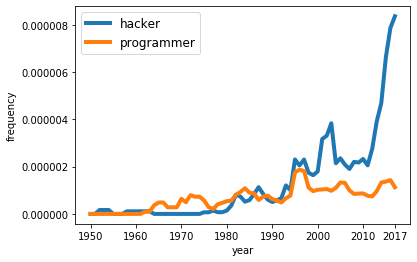

In [375]:
plot_trend(["hacker","programmer"], profession_frequency_df, smooth=3)

In [270]:
frequency_df.head()

,,profession,no_pos_sense,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1st lieutenant,NaN,1st lieutenant,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,8.581945e-08,0.000000e+00,0.000000e+00,4.380046e-08,2.109458e-08,4.213089e-08,2.065482e-08,6.226171e-08,0.000000e+00
2nd lieutenant,NaN,2nd lieutenant,NaN,0.0,0.0,0.0,0.0,0.000002,3.938203e-07,0.0,0.0,...,1.370989e-07,2.002454e-07,0.000000e+00,0.000000e+00,4.380046e-08,0.000000e+00,4.213089e-08,4.130963e-08,8.301561e-08,0.000000e+00
911 dispatcher,NaN,911 dispatcher,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.106545e-08,2.065482e-08,0.000000e+00,3.860729e-08
911 operator,NaN,911 operator,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,6.854946e-08,5.149167e-07,3.460851e-07,2.015718e-07,2.190023e-07,2.953241e-07,2.738508e-07,1.652385e-07,1.452773e-07,1.544292e-07
able seaman,NaN,able seaman,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,...,1.370989e-07,1.144259e-07,1.236018e-07,0.000000e+00,2.190023e-08,0.000000e+00,0.000000e+00,1.239289e-07,1.037695e-07,0.000000e+00


In [272]:
map_soc_df = mentions_df[["profession","no_pos_sense","soc_code","soc_name"]].dropna(subset=["soc_code"]).drop_duplicates()

In [277]:
merge_frequency_df = frequency_df.merge(map_soc_df, on=["profession","no_pos_sense"])

In [286]:
merge_frequency_df.loc[merge_frequency_df.soc_code.str.match("(15)|(17)|(19)|(29)") | merge_frequency_df.no_pos_sense.str.match("(doctor.n.04)"), years.astype(str)].sum().tolist()

[0.0008808073195648023,
 0.0007844016680184978,
 0.0006320964298774568,
 0.0007030996952005487,
 0.0006226310874665836,
 0.0006542465173026391,
 0.00055895346454471,
 0.0008086426363513768,
 0.0007064778289432587,
 0.000774830766774472,
 0.000537850131290303,
 0.0006708253959105091,
 0.0007044617933743535,
 0.0007812826246282696,
 0.0008672390853440649,
 0.0009739910837773656,
 0.0011099308625936869,
 0.0010286336129791938,
 0.0009324974606706039,
 0.0008509166915931199,
 0.000714525785787313,
 0.000820344184240553,
 0.0007456579204101769,
 0.0008756773534905171,
 0.0007950091173625448,
 0.0007465932874246038,
 0.0007100115068317561,
 0.0007432481848230417,
 0.000703018012307484,
 0.0006716963812731283,
 0.0007339406315950854,
 0.0006570301551094056,
 0.0007638504100226047,
 0.0006675275009903407,
 0.0006098951573982955,
 0.0005685735100551907,
 0.0006002359962018157,
 0.0005183492704822541,
 0.0006222067636571152,
 0.0006717589947804789,
 0.000606745657900482,
 0.0006073807430804684,


In [297]:
STEM = soc_frequency_df2.iloc[-1][years.astype(str)].values

In [298]:
STEM

array([0.0008808073195648023, 0.0007844016680184977,
       0.0006320964298774567, 0.0007030996952005487,
       0.0006226310874665836, 0.0006542465173026391,
       0.0005589534645447099, 0.0008086426363513768,
       0.0007064778289432588, 0.0007748307667744719, 0.000537850131290303,
       0.0006708253959105091, 0.0007044617933743535,
       0.0007812826246282696, 0.0008672390853440648,
       0.0009739910837773656, 0.0011099308625936867,
       0.0010286336129791938, 0.0009324974606706039, 0.00085091669159312,
       0.000714525785787313, 0.000820344184240553, 0.0007456579204101768,
       0.0008756773534905171, 0.0007950091173625448,
       0.0007465932874246037, 0.0007100115068317561,
       0.0007432481848230418, 0.0007030180123074839,
       0.0006716963812731283, 0.0007339406315950854,
       0.0006570301551094056, 0.0007638504100226048,
       0.0006675275009903407, 0.0006098951573982955,
       0.0005685735100551907, 0.0006002359962018158,
       0.0005183492704822541, 0.000

In [299]:
stats.spearmanr(STEM, np.arange(1950, 2018))

SpearmanrResult(correlation=-0.7178302859106004, pvalue=5.621779835151907e-12)

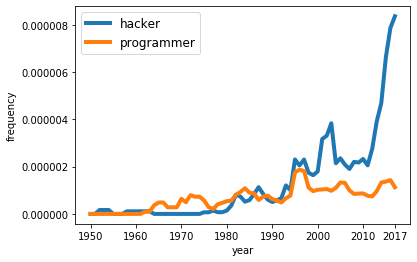

In [300]:
plot_trend(["hacker","programmer"], profession_frequency_df, smooth=3)

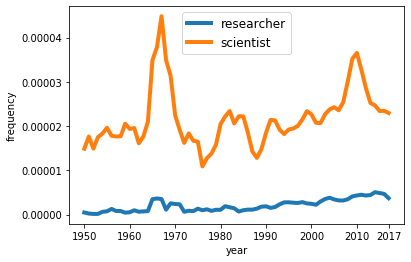

In [306]:
plot_trend(["researcher", "scientist"], profession_frequency_df, smooth=3)

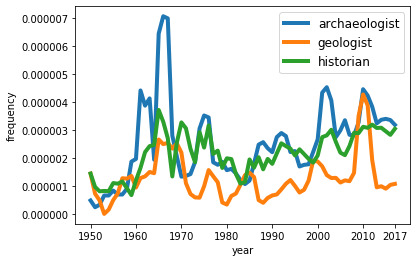

In [302]:
plot_trend(["archaeologist", "geologist", "historian"], profession_frequency_df, smooth=3)

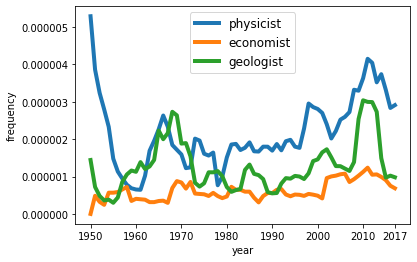

In [304]:
plot_trend(["physicist","economist","geologist"], profession_frequency_df)

In [1]:
plot_trend(["actor","actress", "artist"], profession_frequency_df)

NameError: name 'plot_trend' is not defined

In [309]:
imdb_df = pd.read_csv("data/imdb/imdb.ngram.box_office.csv", index_col=None)

In [310]:
imdb_df.head()

,year,imdb_ID,xml_ID,n_sentences,n_words,n_sentences_title,imdb_year,imdb_genres,imdb_countries,imdb_kind,imdb_languages,imdb_title,first_imdb_country,first_imdb_language,1_gram_count,2_gram_count,3_gram_count,4_gram_count,5_gram_count,box_office_in_dollars
0,2001,35423,3507231.xml,2184,16534,46,2001.0,Comedy;Fantasy;Romance,United States,movie,English;French,Kate & Leopold,United States,English,16534,14350,12177,10265,8545,2562448.0
1,1965,36574,214855.xml,509,3147,14,1965.0,NaN,West Germany,movie,German,"January 30, 1945",West Germany,German,3147,2638,2129,1682,1294,NaN
2,1954,38089,5640815.xml,657,5180,51,1954.0,Drama;War,Italy;France,movie,Italian,Siluri umani,Italy,Italian,5180,4523,3866,3256,2716,NaN
3,1950,40284,4657808.xml,1461,11010,56,1950.0,Drama;History,France;Italy,movie,French;Italian,Sins of Pompeii,France,French,11010,9549,8088,6768,5559,NaN
4,1950,40300,100294.xml,500,6351,26,1950.0,Drama,Mexico,movie,Spanish,The Devil Is a Woman,Mexico,Spanish,6351,5851,5353,4878,4424,NaN


In [319]:
imdb_df[(imdb_df.year <= 2017) & (imdb_df.year >= 1950)].groupby("year").agg(len).imdb_ID.min()

194

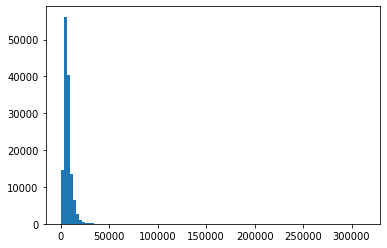

In [313]:
plt.hist(imdb_df['1_gram_count'].values, bins=100)
plt.show()

In [314]:
imdb_df.sort_values(by="1_gram_count", ascending=False).head(5)

,year,imdb_ID,xml_ID,n_sentences,n_words,n_sentences_title,imdb_year,imdb_genres,imdb_countries,imdb_kind,imdb_languages,imdb_title,first_imdb_country,first_imdb_language,1_gram_count,2_gram_count,3_gram_count,4_gram_count,5_gram_count,box_office_in_dollars
2864,1965,57775,5131043.xml,21669,314077,1823,1965.0,Documentary;History,United States,tv series,English,National Geographic Specials,United States,English,314077,292408,270748,249328,228205,NaN
11133,1989,97810,3109052.xml,29085,221695,877,1989.0,Drama;War,Belgium;Australia;United States;Sweden;Portuga...,tv mini series,English,The Mahabharata,Belgium,English,221695,192610,163758,136484,111327,NaN
135733,2014,1999570523,6589434.xml,33491,215703,1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215703,182212,149017,118305,90946,NaN
26573,1999,426719,6249801.xml,24312,202772,1224,1999.0,Animation;Action;Adventure;Comedy;Fantasy,Japan,tv series,Japanese,Hunter x Hunter,Japan,Japanese,202772,178460,154875,133597,113805,NaN
103705,2013,2899140,5098295.xml,3079,199775,21,2013.0,Animation;Action;Adventure;Drama;Fantasy;Horror,Japan,episode,Japanese,The World the Girl Saw: The Struggle for Trost...,Japan,Japanese,199775,196696,193630,190640,187688,NaN


In [315]:
set(mentions_df.imdb).issubset(set(imdb_df.imdb_ID))

True

In [320]:
mentions_df.shape

(3657827, 21)

In [321]:
mentions_df[mentions_df.imdb.isin(imdb_df.imdb_ID)].shape

(3657827, 21)

In [322]:
soc_frequency_sample_df = pd.read_csv("data/analysis_data/soc_frequency.sample.csv", index_col=None)

In [327]:
soc_frequency_sample_df.index = soc_frequency_sample_df.soc_code

In [331]:
soc_frequency_sample_df

,soc_code,soc_name,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
soc_code,,,,,,,,,,,,,,,,,,,,,
11,11,Management,0.000416,4.333543e-04,0.000613,3.949182e-04,5.619634e-04,0.000482,6.653730e-04,4.666162e-04,...,0.000350,3.586366e-04,3.356851e-04,0.000349,0.000298,0.000289,0.000337,3.832855e-04,0.000359,3.205964e-04
13,13,Business and Financial Operations,0.000054,4.616489e-05,0.000040,4.992101e-05,3.875610e-05,0.000035,7.101684e-05,4.987994e-05,...,0.000032,5.789313e-05,7.639650e-05,0.000044,0.000034,0.000044,0.000043,3.489938e-05,0.000041,3.074212e-05
15,15,Computer and Mathematical,0.000000,9.927933e-07,0.000001,1.134568e-06,1.571193e-06,0.000000,1.136269e-06,0.000000e+00,...,0.000002,4.511153e-06,3.046187e-06,0.000006,0.000007,0.000004,0.000003,2.425858e-05,0.000002,7.905118e-06
17,17,Architecture and Engineering,0.000016,3.226578e-05,0.000029,2.836421e-05,2.252043e-05,0.000042,4.204197e-05,3.344890e-05,...,0.000017,2.481134e-05,1.599248e-05,0.000018,0.000026,0.000024,0.000029,1.455515e-05,0.000020,2.722874e-05
19,19,"Life, Physical, and Social Science",0.000048,3.425137e-05,0.000020,3.460433e-05,2.828148e-05,0.000021,3.295181e-05,3.696983e-05,...,0.000088,1.112751e-04,8.529324e-05,0.000049,0.000033,0.000025,0.000050,6.226368e-05,0.000056,8.256456e-05
21,21,Community and Social Service,0.000173,2.287981e-04,0.000135,1.839401e-04,2.288705e-04,0.000243,1.749855e-04,1.495132e-04,...,0.000187,1.904513e-04,1.168794e-04,0.000120,0.000067,0.000134,0.000125,9.056535e-05,0.000183,1.187084e-04
23,23,Legal,0.000248,2.393165e-04,0.000257,1.927663e-04,2.102962e-04,0.000128,1.416744e-04,2.415754e-04,...,0.000226,2.056572e-04,1.969648e-04,0.000201,0.000153,0.000188,0.000176,2.878677e-04,0.000185,1.423336e-04
25,25,Educational Instruction and Library,0.000143,2.576299e-04,0.000117,1.781272e-04,2.581994e-04,0.000175,1.329435e-04,1.719391e-04,...,0.000216,1.090195e-04,1.629710e-04,0.000157,0.000135,0.000105,0.000125,7.439297e-05,0.000065,8.607795e-05
27,27,"Arts, Design, Entertainment, Sports, and Media",0.000421,4.312520e-04,0.000449,3.330842e-04,4.077893e-04,0.000348,4.183216e-04,3.528301e-04,...,0.000463,4.003355e-04,4.299960e-04,0.000338,0.000489,0.000498,0.000461,3.431121e-04,0.000368,3.382066e-04


In [365]:
corr_col = []
pvalue_col = []

for i in range(23):
    code = 11 + 2*i
    time = years.astype(np.int)
    freq = soc_frequency_sample_df.loc[code, years]
    corr, pvalue = stats.spearmanr(freq, time)
    corr_col.append(corr)
    pvalue_col.append(pvalue)
    
corr, pvalue = stats.spearmanr(soc_frequency_sample_df.loc[100, years].values, years.astype(int))
corr_col.append(corr)
pvalue_col.append(pvalue)
    
soc_frequency_sample_df["correlation"] = corr_col
soc_frequency_sample_df["pvalue"] = pvalue_col

_df = soc_frequency_sample_df.sort_values(by="correlation")
years = np.arange(1950, 2018)

soc_codes = _df.index.values
soc_names = _df.soc_name.values
corr = _df.correlation.values
pvalues = _df.pvalue.values

plt.rcParams.update({"font.size": 10})
plt.figure(figsize=(12, 20))
plt.barh(soc_names, corr, color="palevioletred", height=0.6)
plt.yticks(ticks=np.arange(len(soc_names)), labels=[])
plt.axvline(0, color="black", lw=0.75)
plt.grid(axis="y", alpha=0.5)

for i, c in enumerate(corr):
    if abs(c) > 0.75:
        color = "black"
        if c > 0:
            x = c - 0.15
        else:
            x = c + 0.05
    else:
        color = "black"
        if c > 0:
            x = c + 0.05
        else:
            x = c - 0.15
    plt.text(x, i - 0.05, f"{c:.3f}", color=color)
    
    label = soc_names[i]
    if i == 20:
        plt.text(-0.73, i-0.05, label)
    elif i == 21:
        plt.text(-0.525, i-0.05, label)
    elif i == 22:
        plt.text(-0.46, i-0.05, label)
    else:
        plt.text(0.05, i-0.05, label)
    
plt.show()
# tikzplotlib.save("data/analysis_data/soc_trend.tex")

KeyError: "None of [Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,\n            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,\n            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,\n            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,\n            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,\n            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,\n            2016, 2017],\n           dtype='int64')] are in the [index]"

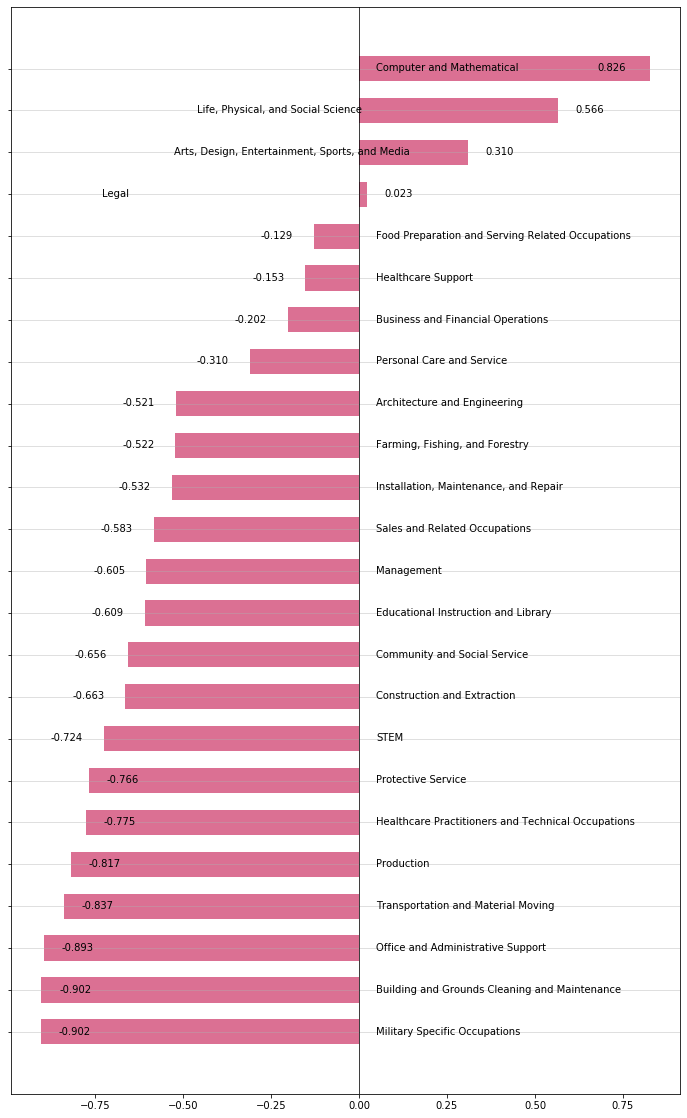

In [371]:
soc_frequency_cutoff_df = pd.read_csv("data/analysis_data/soc_frequency.cutoff.csv", index_col=None)
soc_frequency_cutoff_df.index = soc_frequency_cutoff_df.soc_code

corr_col = []
pvalue_col = []

for i in range(23):
    code = 11 + 2*i
    time = years.astype(np.int)
    freq = soc_frequency_cutoff_df.loc[code, years.astype(str)]
    corr, pvalue = stats.spearmanr(freq, time)
    corr_col.append(corr)
    pvalue_col.append(pvalue)
    
corr, pvalue = stats.spearmanr(soc_frequency_cutoff_df.loc[100, years.astype(str)].values, years.astype(int))
corr_col.append(corr)
pvalue_col.append(pvalue)
    
soc_frequency_cutoff_df["correlation"] = corr_col
soc_frequency_cutoff_df["pvalue"] = pvalue_col

_df = soc_frequency_cutoff_df.sort_values(by="correlation")
years = np.arange(1950, 2018)

soc_codes = _df.index.values
soc_names = _df.soc_name.values
corr = _df.correlation.values
pvalues = _df.pvalue.values

plt.rcParams.update({"font.size": 10})
plt.figure(figsize=(12, 20))
plt.barh(soc_names, corr, color="palevioletred", height=0.6)
plt.yticks(ticks=np.arange(len(soc_names)), labels=[])
plt.axvline(0, color="black", lw=0.75)
plt.grid(axis="y", alpha=0.5)

for i, c in enumerate(corr):
    if abs(c) > 0.75:
        color = "black"
        if c > 0:
            x = c - 0.15
        else:
            x = c + 0.05
    else:
        color = "black"
        if c > 0:
            x = c + 0.05
        else:
            x = c - 0.15
    plt.text(x, i - 0.05, f"{c:.3f}", color=color)
    
    label = soc_names[i]
    if i == 20:
        plt.text(-0.73, i-0.05, label)
    elif i == 21:
        plt.text(-0.525, i-0.05, label)
    elif i == 22:
        plt.text(-0.46, i-0.05, label)
    else:
        plt.text(0.05, i-0.05, label)
    
plt.show()

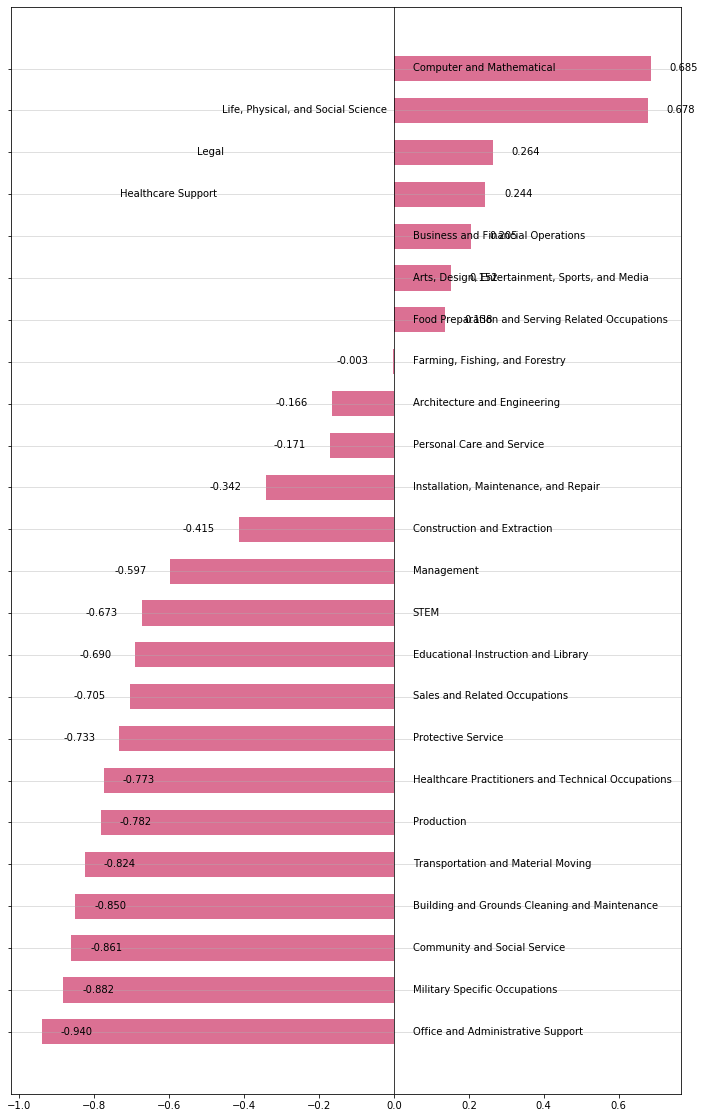

In [373]:
soc_frequency_year_df = pd.read_csv("data/analysis_data/soc_frequency.year.csv", index_col=None)
soc_frequency_year_df.index = soc_frequency_year_df.soc_code
years = soc_frequency_year_df.columns[2:]

corr_col = []
pvalue_col = []

for i in range(23):
    code = 11 + 2*i
    time = years.astype(np.int)
    freq = soc_frequency_year_df.loc[code, years.astype(str)]
    corr, pvalue = stats.spearmanr(freq, time)
    corr_col.append(corr)
    pvalue_col.append(pvalue)
    
corr, pvalue = stats.spearmanr(soc_frequency_year_df.loc[100, years.astype(str)].values, years.astype(int))
corr_col.append(corr)
pvalue_col.append(pvalue)
    
soc_frequency_year_df["correlation"] = corr_col
soc_frequency_year_df["pvalue"] = pvalue_col

_df = soc_frequency_year_df.sort_values(by="correlation")
years = np.arange(1950, 2018)

soc_codes = _df.index.values
soc_names = _df.soc_name.values
corr = _df.correlation.values
pvalues = _df.pvalue.values

plt.rcParams.update({"font.size": 10})
plt.figure(figsize=(12, 20))
plt.barh(soc_names, corr, color="palevioletred", height=0.6)
plt.yticks(ticks=np.arange(len(soc_names)), labels=[])
plt.axvline(0, color="black", lw=0.75)
plt.grid(axis="y", alpha=0.5)

for i, c in enumerate(corr):
    if abs(c) > 0.75:
        color = "black"
        if c > 0:
            x = c - 0.15
        else:
            x = c + 0.05
    else:
        color = "black"
        if c > 0:
            x = c + 0.05
        else:
            x = c - 0.15
    plt.text(x, i - 0.05, f"{c:.3f}", color=color)
    
    label = soc_names[i]
    if i == 20:
        plt.text(-0.73, i-0.05, label)
    elif i == 21:
        plt.text(-0.525, i-0.05, label)
    elif i == 22:
        plt.text(-0.46, i-0.05, label)
    else:
        plt.text(0.05, i-0.05, label)
    
plt.show()

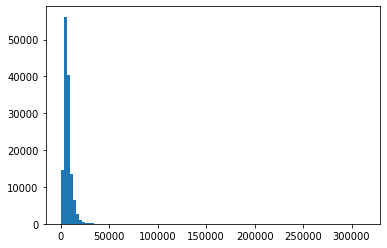

In [335]:
plt.hist(imdb_df['1_gram_count'].values, bins=100)
plt.show()

In [336]:
np.quantile(imdb_df['1_gram_count'], 0.99)

21070.0

In [337]:
imdb_df.shape

(135998, 20)

In [341]:
series = imdb_df[imdb_df.year != 2018].groupby('year').agg({'1_gram_count':'mean'})['1_gram_count']

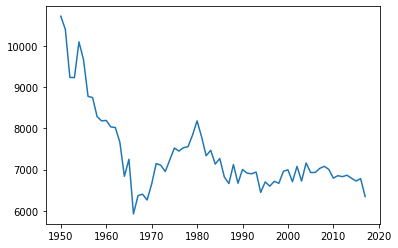

In [342]:
plt.plot(series)

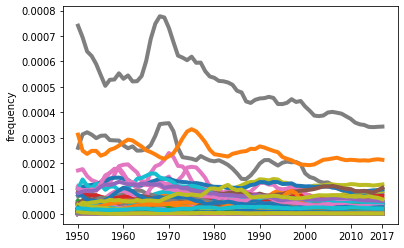

In [354]:
plot_trend(profession_frequency_df.index, profession_frequency_df, xlabel=None, legend=False)

In [349]:
profession_frequency_df.index[:10]

Index(['accountant', 'acrobat', 'actor', 'actress', 'administrator', 'admiral',
       'advertiser', 'adviser', 'airman', 'alderman'],
      dtype='object', name='profession')

In [361]:
mean_freq = profession_frequency_df[years.astype(str)].mean(axis=1)

<BarContainer object of 500 artists>

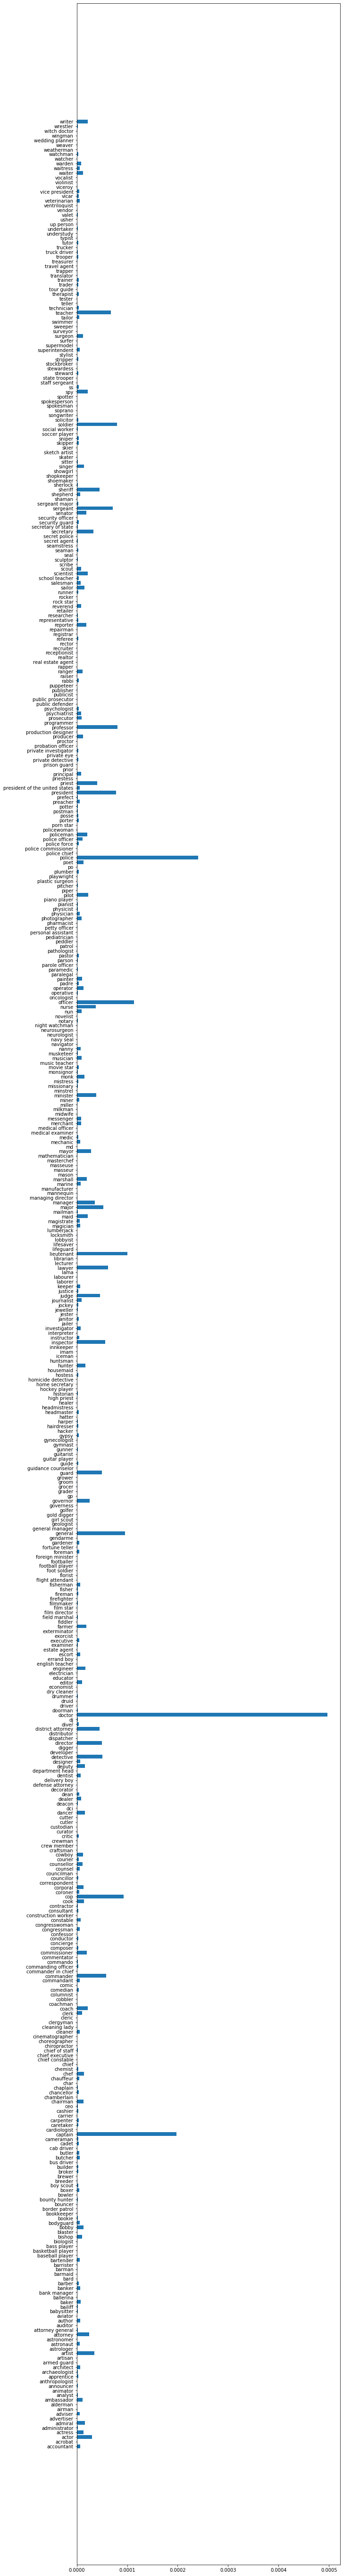

In [364]:
plt.figure(figsize=(10, 100))
plt.barh(mean_freq.index, mean_freq.values)

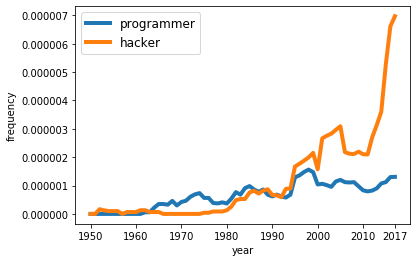

In [374]:
plot_trend(["programmer","hacker"], profession_frequency_df)